In [1]:
import sys
import tensorflow as tf
sys.path.append("/aiffel/aiffel/Blindless/CODE/Models")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/aiffel/aiffel/Blindless/CODE/Models/Pyramid")
import Pyramid

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'Pyramid_30ep_512_aG'
INPUT_SHAPE = (256, 256, 1)
MODEL_PATH = "/aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parameters/" + FILE_NAME + ".h5"
HISTORY_PATH = "/aiffel/aiffel/Blindless/CODE/Models/Pyramid/history/" + FILE_NAME + '_history' ".json"
SOURCE = '/aiffel/aiffel/Blindless/DATA'

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 512, 512, 16)         32        ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 8)          16        ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 16)         160       ['input_1[0][0]']             
                                                                                              

 gePooling2D)                                                                                     
                                                                                                  
 conv2d_20 (Conv2D)          (None, 32, 32, 32)           4128      ['average_pooling2d[0][0]']   
                                                                                                  
 conv2d_21 (Conv2D)          (None, 16, 16, 32)           4128      ['average_pooling2d_1[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)          (None, 8, 8, 32)             4128      ['average_pooling2d_2[0][0]'] 
                                                                                                  
 conv2d_23 (Conv2D)          (None, 4, 4, 32)             4128      ['average_pooling2d_3[0][0]'] 
                                                                                                  
 conv2d_tr

                                                                                                  
 average_pooling2d_11 (Aver  (None, 16, 16, 128)          0         ['conv2d_transpose_9[0][0]']  
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_28 (Conv2D)          (None, 128, 128, 32)         4128      ['average_pooling2d_8[0][0]'] 
                                                                                                  
 conv2d_29 (Conv2D)          (None, 64, 64, 32)           4128      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 conv2d_30 (Conv2D)          (None, 32, 32, 32)           4128      ['average_pooling2d_10[0][0]']
                                                                                                  
 conv2d_31

Total params: 1300305 (4.96 MB)
Trainable params: 1300305 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

# Create augmentation
train_preproc = preprocess.build_augmentation_for_adaptive()
test_preproc = preprocess.build_augmentation_for_adaptive(is_train=False)

# Create train, test generator
train_generator = data_generator.AdaptiveDataGenerator(
    SOURCE, 
    number_of_images=4,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.AdaptiveDataGenerator(
    SOURCE, 
    number_of_images=4,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = Pyramid.unet_model(INPUT_SHAPE)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 256, 256, 16)         32        ['input_2[0][0]']             
                                                                                                  
 conv2d_37 (Conv2D)          (None, 256, 256, 8)          16        ['input_2[0][0]']             
                                                                                                  
 conv2d_38 (Conv2D)          (None, 256, 256, 16)         160       ['input_2[0][0]']             
                                                                                            

 agePooling2D)                                                                                    
                                                                                                  
 conv2d_57 (Conv2D)          (None, 16, 16, 32)           4128      ['average_pooling2d_16[0][0]']
                                                                                                  
 conv2d_58 (Conv2D)          (None, 8, 8, 32)             4128      ['average_pooling2d_17[0][0]']
                                                                                                  
 conv2d_59 (Conv2D)          (None, 4, 4, 32)             4128      ['average_pooling2d_18[0][0]']
                                                                                                  
 conv2d_60 (Conv2D)          (None, 2, 2, 32)             4128      ['average_pooling2d_19[0][0]']
                                                                                                  
 conv2d_tr

                                                                                                  
 average_pooling2d_27 (Aver  (None, 8, 8, 128)            0         ['conv2d_transpose_29[0][0]'] 
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_65 (Conv2D)          (None, 64, 64, 32)           4128      ['average_pooling2d_24[0][0]']
                                                                                                  
 conv2d_66 (Conv2D)          (None, 32, 32, 32)           4128      ['average_pooling2d_25[0][0]']
                                                                                                  
 conv2d_67 (Conv2D)          (None, 16, 16, 32)           4128      ['average_pooling2d_26[0][0]']
                                                                                                  
 conv2d_68

Total params: 1300305 (4.96 MB)
Trainable params: 1300305 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [ ]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH)

Epoch 1/30
295/295 [==============================] - 399s 1s/step - loss: 0.6962 - sensitivity: 0.0632 - specificity: 0.9859 - accuracy: 0.9239 - val_loss: 0.4624 - val_sensitivity: 0.6058 - val_specificity: 0.9394 - val_accuracy: 0.9192

Epoch 00001: val_sensitivity improved from -inf to 0.60580, saving model to /aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parameters/Pyramid_30ep_512_aG.h5
Epoch 2/30
295/295 [==============================] - 318s 1s/step - loss: 0.4252 - sensitivity: 0.5512 - specificity: 0.9581 - accuracy: 0.9319 - val_loss: 0.3927 - val_sensitivity: 0.6221 - val_specificity: 0.9546 - val_accuracy: 0.9336

Epoch 00002: val_sensitivity improved from 0.60580 to 0.62207, saving model to /aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parameters/Pyramid_30ep_512_aG.h5
Epoch 3/30
295/295 [==============================] - 317s 1s/step - loss: 0.3812 - sensitivity: 0.5780 - specificity: 0.9648 - accuracy: 0.9396 - val_loss: 0.3657 - val_sensitivity: 0.5583 - val

Epoch 26/30
295/295 [==============================] - 319s 1s/step - loss: 0.2686 - sensitivity: 0.6848 - specificity: 0.9787 - accuracy: 0.9603 - val_loss: 0.2728 - val_sensitivity: 0.7001 - val_specificity: 0.9757 - val_accuracy: 0.9586

Epoch 00026: val_sensitivity did not improve from 0.71492
Epoch 27/30
295/295 [==============================] - ETA: 0s - loss: 0.2636 - sensitivity: 0.6920 - specificity: 0.9784 - accuracy: 0.9603

125/125 [==============================] - 540s 4s/step - loss: 0.2511 - sensitivity: 0.7423 - specificity: 0.9756 - accuracy: 0.9614
Loss: 0.25105515122413635
Sensitivity: 0.7422980666160583
Specificity: 0.9756459593772888
Accuracy: 0.9613534212112427


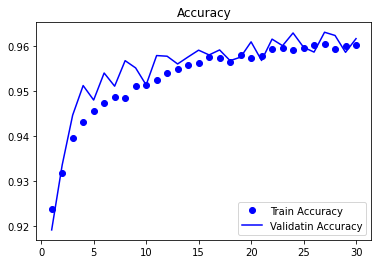

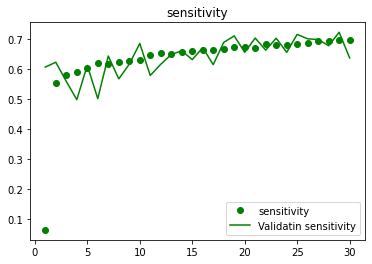

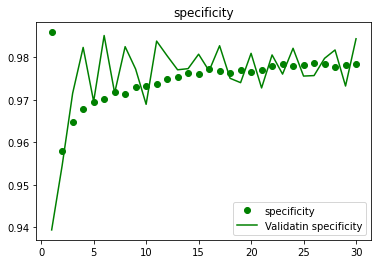

<Figure size 432x288 with 0 Axes>

In [3]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

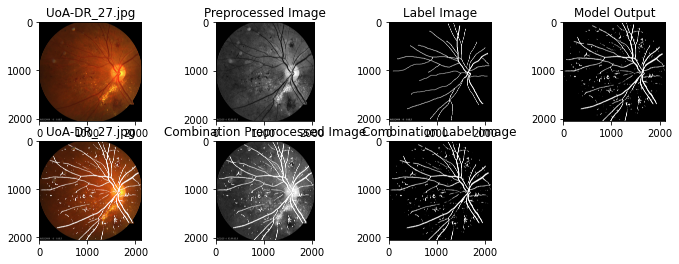

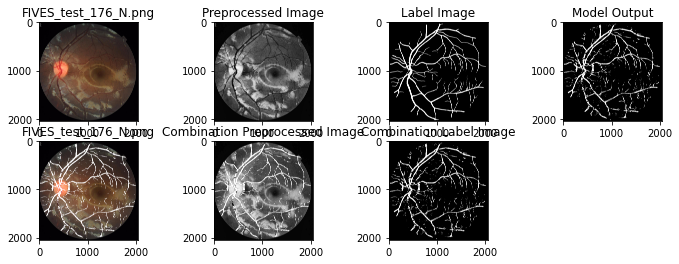

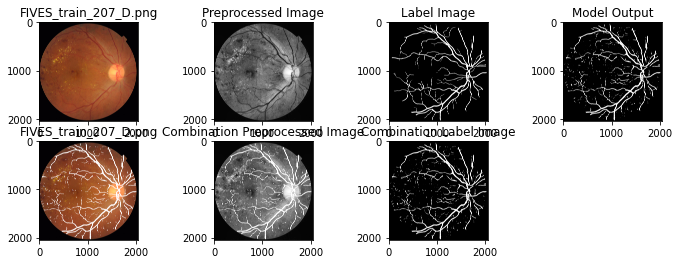

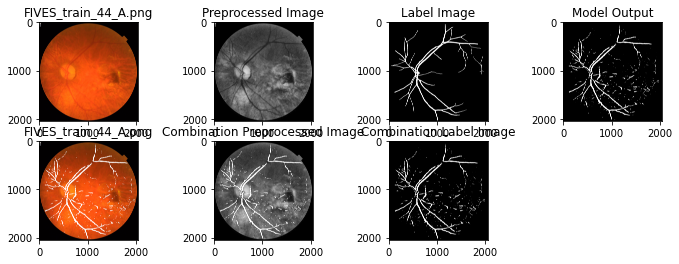

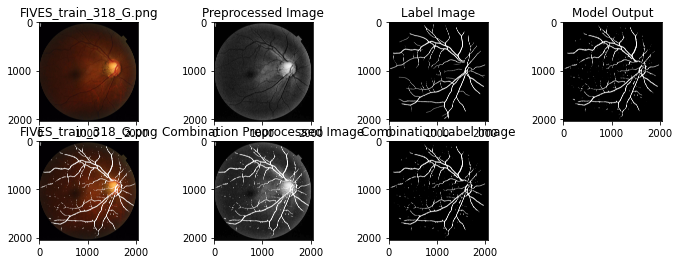

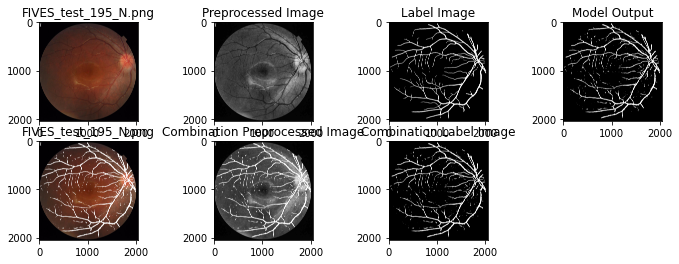

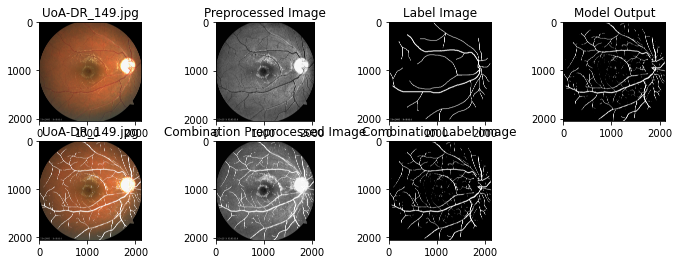

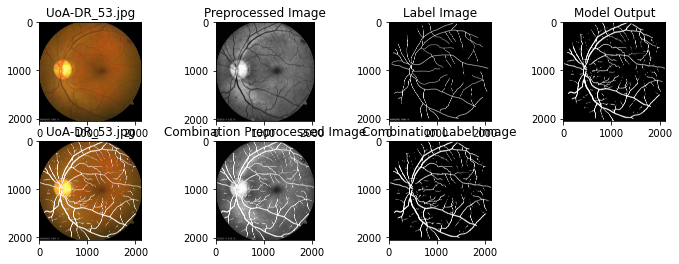

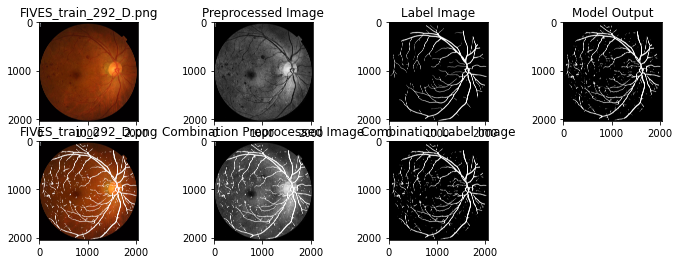

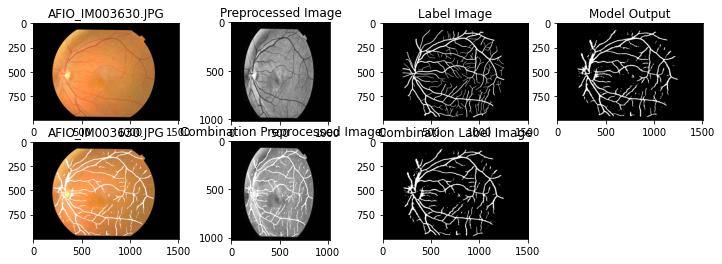

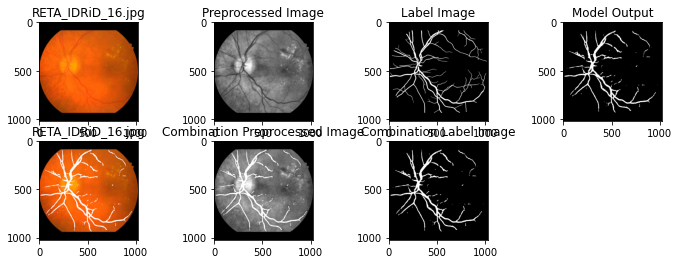

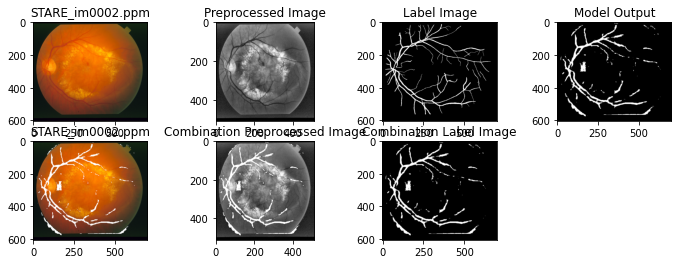

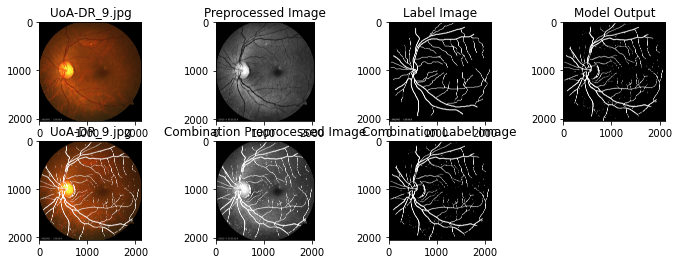

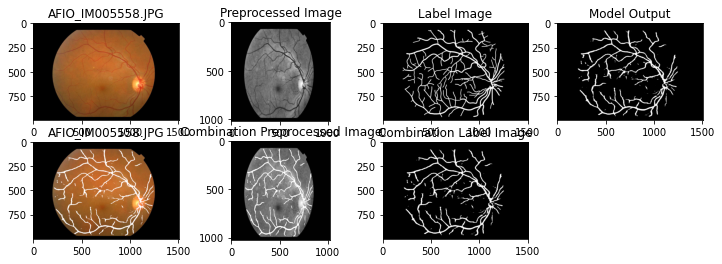

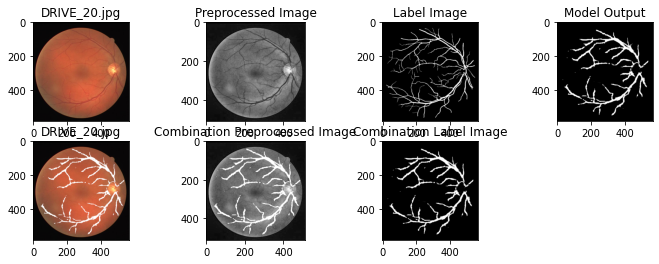

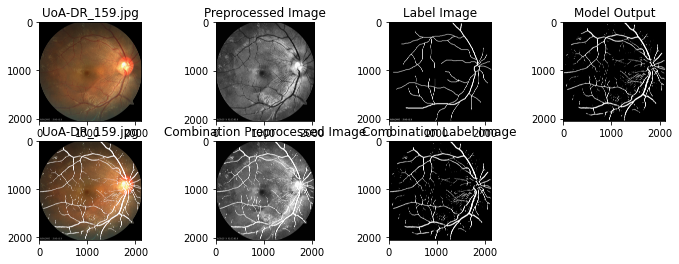

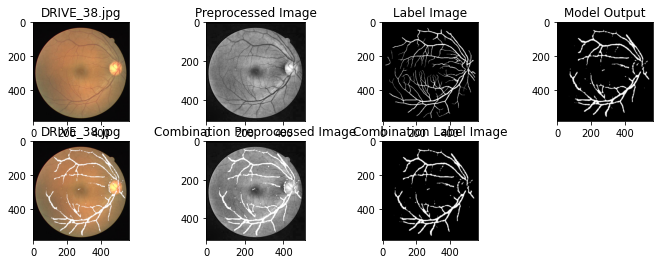

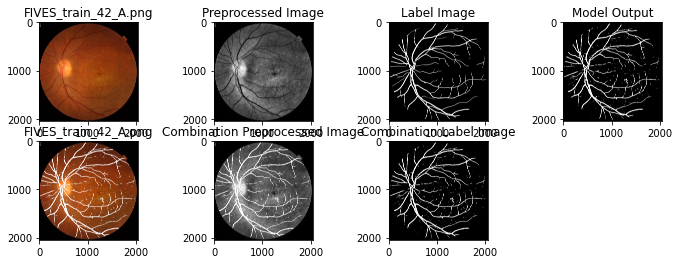

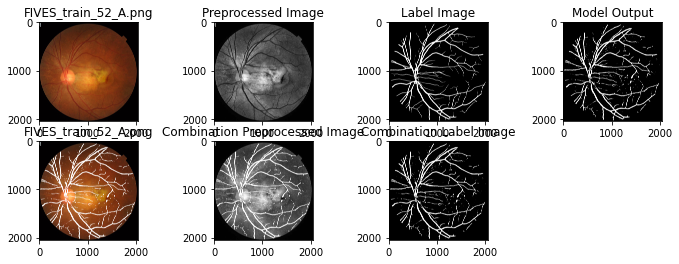

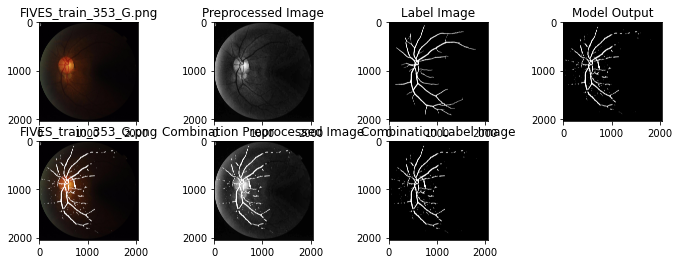

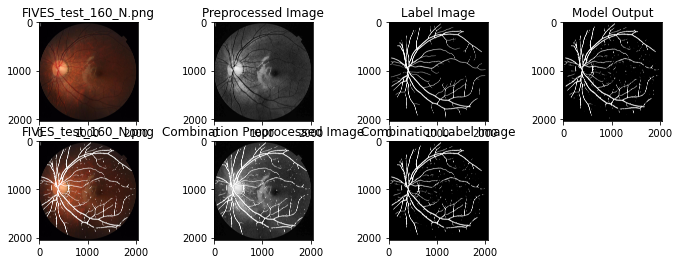

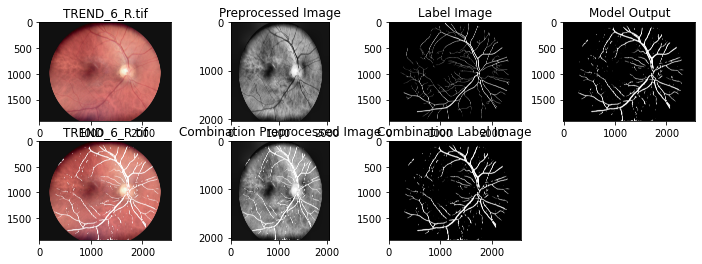

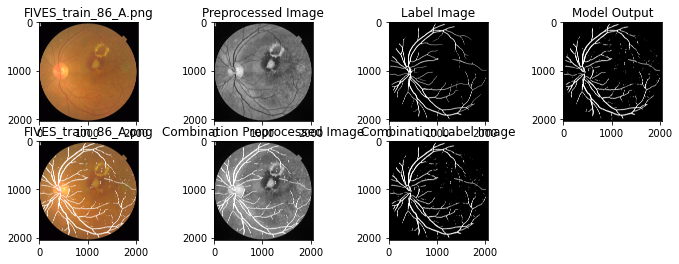

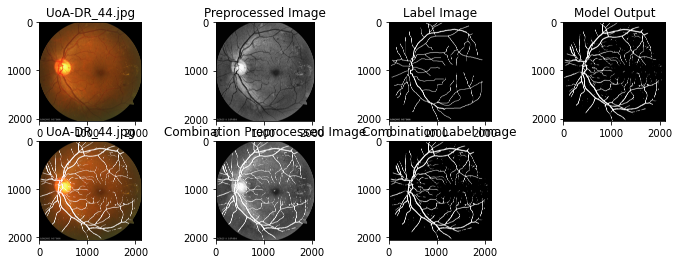

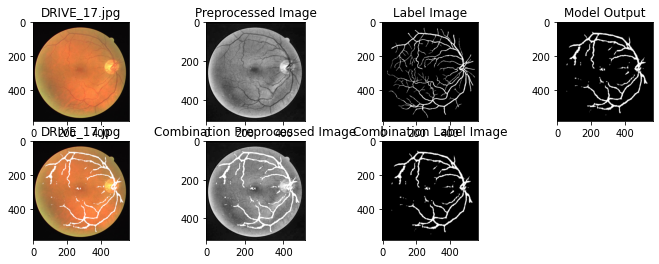

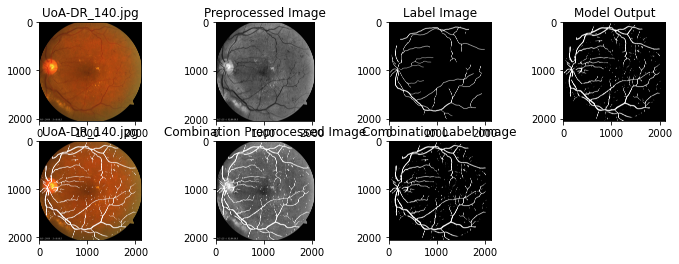

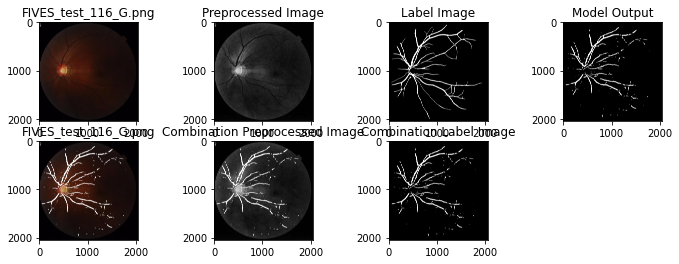

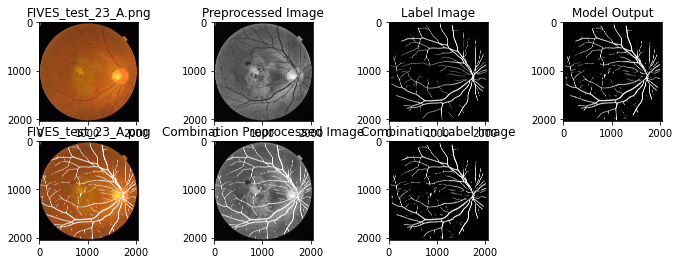

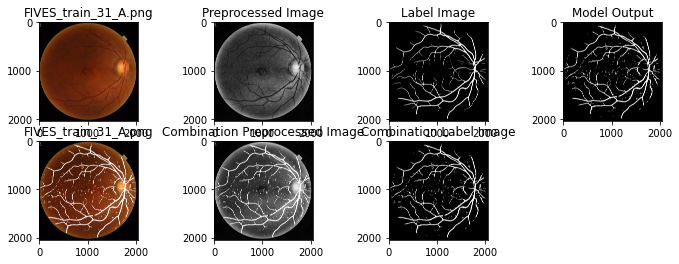

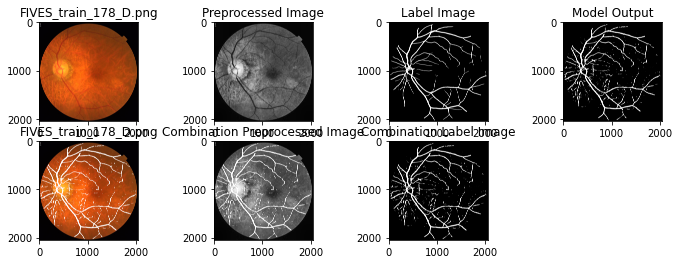

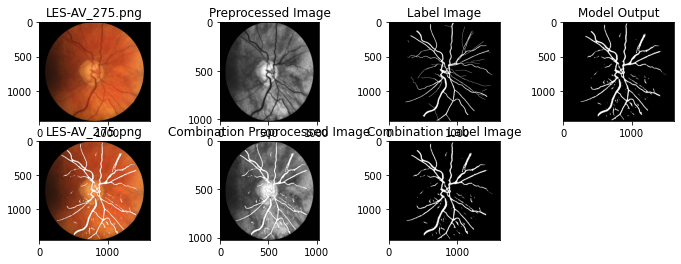

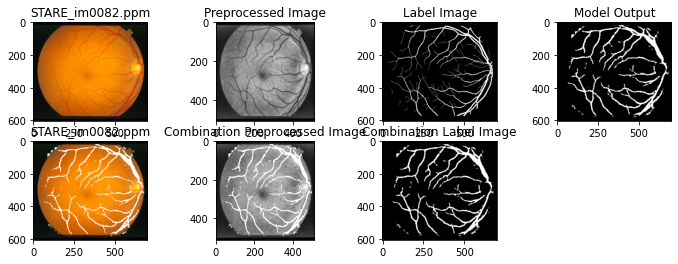

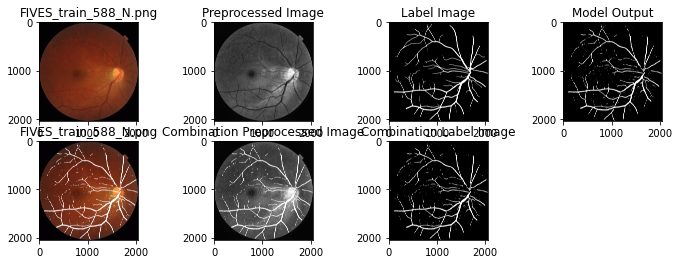

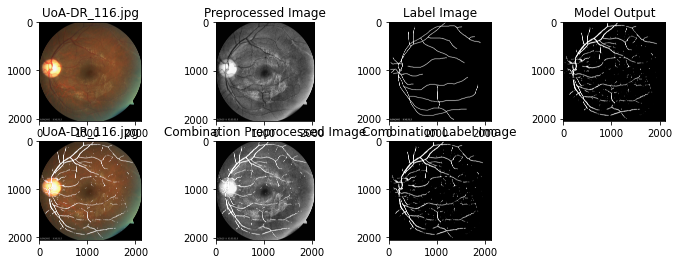

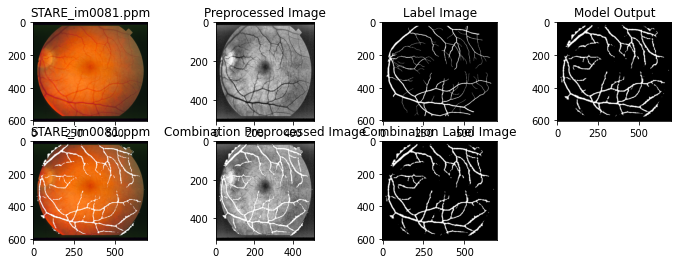

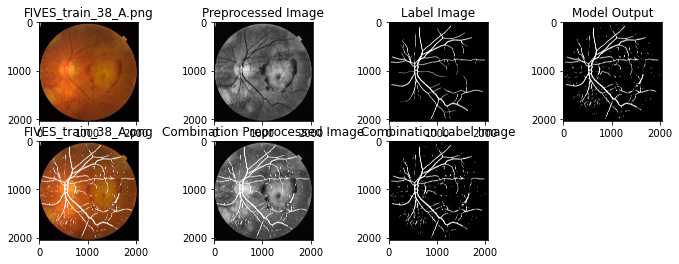

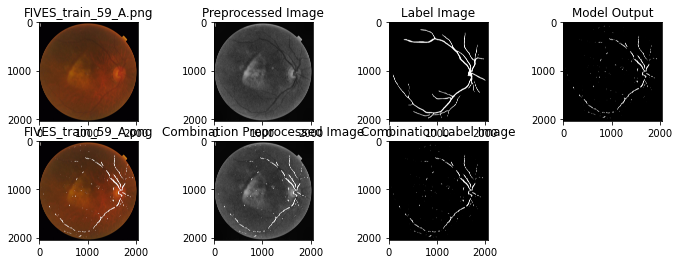

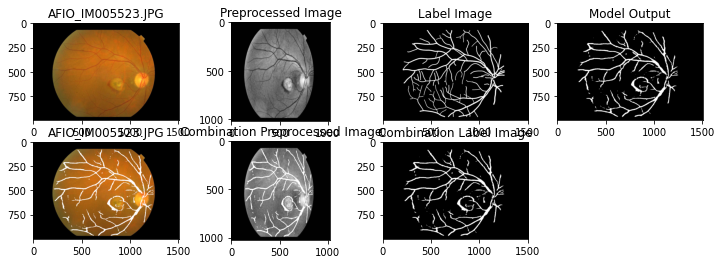

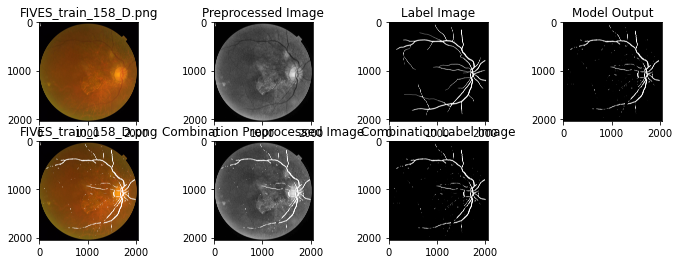

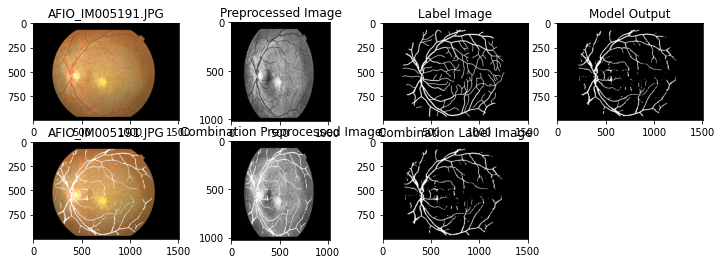

In [5]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot model result
num_images_to_select = 40
check_result.visualize_AG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE)